In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
incarcerate=pd.read_csv('./datasets/census_incarceration_TMP.csv')
incarcerate.drop(columns='FIPS', inplace=True)
incarcerate.head()

,state,county,total_population_20,incarcerated_20,total_population_10,incarcerated_10,total_population_00,incarcerated_00
0,MA,Barnstable County,228996,213,215888,438,222230,266
1,MA,Berkshire County,129026,188,131219,352,134953,279
2,MA,Bristol County,579200,885,548285,1318,534678,1058
3,MA,Dukes County,20600,15,16535,30,14987,34
4,MA,Essex County,809829,2118,743159,1431,723419,1574


## Notice that 'LA' is in the list, and it is Los Angeles, even thought it is not a state but it is the most populous area in the US, you'll see why later
* might need to combine it with CA after EDA, for now, let's keep it for fun

In [25]:
#check unique state names, 'LA' stands out!
incarcerate.state.unique()

array(['MA', 'CT', 'WV', 'VT', 'RI', 'DC', 'PA', 'AR', 'OK', 'NE', 'ID',
       'MO', 'LA', 'UT', 'AZ', 'SC', 'GA', 'TN', 'NY', 'MS', 'NM', 'IL',
       'MI', 'ME', 'IN', 'NC', 'DE', 'TX', 'AL', 'CA', 'VA', 'SD', 'MT',
       'NJ', 'HI', 'OH', 'MN', 'OR', 'ND', 'KY', 'NH', 'CO', 'WA', 'AK',
       'WY', 'IA', 'WI', 'PR', 'FL', 'KS', 'NV', 'MD'], dtype=object)

In [26]:
#create a dataframe groupby 'state'
incarcerate_20=incarcerate.groupby('state')[['total_population_20','incarcerated_20']].sum()
incarcerate_20=incarcerate_20.reset_index()
incarcerate_20.head()

,state,total_population_20,incarcerated_20
0,AK,700421,4833
1,AL,5024279,39749
2,AR,3011524,27079
3,AZ,7151502,64154
4,CA,39538223,201570


In [28]:
#create a column with the incarcerated ratio (other words, normalized by total population)
incarcerate_20['incarcerated_rate']=incarcerate_20.iloc[:,2]/incarcerate_20.iloc[:,1]
incarcerate_20.head()

,state,total_population_20,incarcerated_20,incarcerated_rate
0,AK,700421,4833,0.006900
1,AL,5024279,39749,0.007911
2,AR,3011524,27079,0.008992
3,AZ,7151502,64154,0.008971
4,CA,39538223,201570,0.005098


## When look at the top states with high incarcerated_ratio, it showed that LA with the most populous area has the highest incarcerated rate

In [29]:
#look at the top 5 states/area with the highest incarcerated_rate
incarcerate_20.sort_values(by=['incarcerated_rate', 'total_population_20'], ascending=[False, False]).head()

,state,total_population_20,incarcerated_20,incarcerated_rate
18,LA,4657757,51241,0.011001
50,WV,1793716,19669,0.010966
25,MS,2961279,30745,0.010382
36,OK,3959353,38455,0.009712
2,AR,3011524,27079,0.008992


#### Paradise states do not have high incarcerated_Rate

In [44]:
#look at the top 5 states with the lowest incarcerated_rate
incarcerate_20.sort_values(by=['incarcerated_rate', 'total_population_20'], ascending=[False, False]).tail()

,state,total_population_20,incarcerated_20,incarcerated_rate
40,RI,1097379,3082,0.002809
11,HI,1455271,3752,0.002578
19,MA,7029917,17969,0.002556
21,ME,1362359,3360,0.002466
47,VT,643077,1219,0.001896


## check the correlation using pairplot

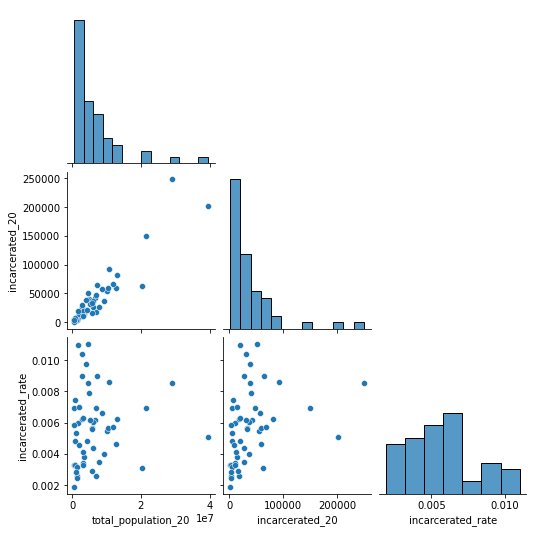

In [37]:
sns.pairplot(incarcerate_20.iloc[:,1:], corner=True);

## observations:
* incarcerate population correlate linearly with total population
* incarcerate rate does not have much correlation with any variables.

### check which state with intermediate population but below mean incarcerated rate ---  NY and CA

In [42]:
incarcerate_20[(incarcerate_20['total_population_20']>1.8e7) & (incarcerate_20['incarcerated_rate']<0.006)]

,state,total_population_20,incarcerated_20,incarcerated_rate
4,CA,39538223,201570,0.005098
34,NY,20201249,62707,0.003104


### check which state with intermediate population but above mean incarcerated rate ---  FL and TX

In [41]:
incarcerate_20[(incarcerate_20['total_population_20']>1.8e7) & (incarcerate_20['incarcerated_rate']>0.006)]

,state,total_population_20,incarcerated_20,incarcerated_rate
9,FL,21538187,149333,0.006933
44,TX,29145505,248764,0.008535


### Interesting questions are:
1. **how sufficient the correctional facilities in these state?** --Gaby can help to locate the data from 2019 on correctional facilities by states.
2. **what is the distribution of crime type for the incarcerated rates at each state?** 
3. **is the mental health care sufficient?** ---after we have the data, we can explore further
4. **is there any demographic preference in incarcerated rate?**